In [32]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
# FutureWarning뜨는 에러 모두 무시.
warnings.simplefilter(action="ignore", category=FutureWarning)

# 한글을 plot할 수 있게.
plt.rc('font', family="AppleGothic")

# 이거 없어도 됨.
%matplotlib inline

# 한글 쓸다보면 (-) 기호 출력이 안됨. 그래서 이거 써줘야 (-)를 유니코드로 취급하지 않게 하기 위해 
plt.rcParams['axes.unicode_minus'] = False
plt.rc('figure', figsize=(10, 6))

In [33]:
start = datetime(2015, 1, 1)
end = datetime.now()

FB = web.DataReader('FB', 'yahoo', start, end)
FB.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,79.800003,77.860001,79.540001,78.019997,19935400,78.019997
2015-01-02,78.930000,77.699997,78.580002,78.449997,18177500,78.449997
2015-01-05,79.250000,76.860001,77.980003,77.190002,26452200,77.190002
2015-01-06,77.589996,75.360001,77.230003,76.150002,27399300,76.150002
2015-01-07,77.360001,75.820000,76.760002,76.150002,22045300,76.150002


In [34]:
SE = web.DataReader('005930.KS', 'yahoo', start, end)
SE.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,26800.0,26540.0,26800.0,26600.0,8774950.0,257.958313
2015-01-05,26720.0,26260.0,26720.0,26660.0,10139500.0,258.540161
2015-01-06,26340.0,25760.0,26300.0,25900.0,15235500.0,251.169937
2015-01-07,26220.0,25640.0,25880.0,26140.0,14322750.0,253.497406
2015-01-08,26780.0,26200.0,26780.0,26280.0,14477600.0,254.855087


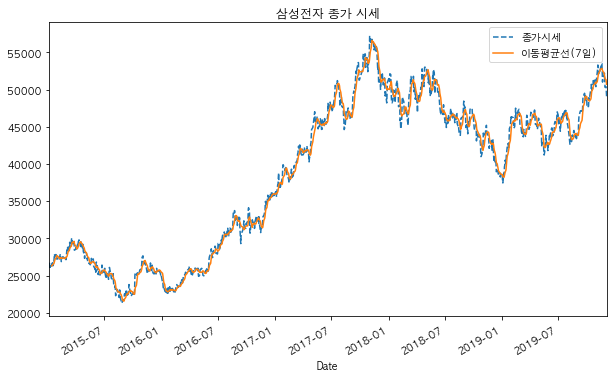

In [38]:
SE['Close'].plot(style='--')
SE['Close'].rolling(7).mean().plot()
plt.title("삼성전자 종가 시세")
plt.legend(['종가시세', '이동평균선(7일)'])

In [6]:
class Node:
    nodeNext = None
    nodePrev = ''
    objValue = ''
    binHead = False
    binTail = False

    def __init__(self, objValue='', nodeNext=None, binHead=None, binTail=None):
        self.nodeNext = nodeNext
        self.objValue = objValue
        self.binHead = binHead
        self.binTail = binTail

    def getValue(self):
        return self.objValue
    def setValue(self, objValue):
        self.objValue = objValue
    def getNext(self):
        return self.nodeNext
    def setNext(self, nodeNext):
        self.nodeNext = nodeNext
    def isHead(self):
        return self.binHead
    def isTail(self):
        return self.binTail


class SinglyLinkedList:
    nodeHead = ''
    nodeTail = ''
    size = 0

    def __init__(self):
        self.nodeTail = Node(binTail=True)
        self.nodeHead = Node(binHead=True, nodeNext=self.nodeTail)

    def insertAt(self, objInsert, idxInsert):
        nodeNew = Node(objValue=objInsert)
        nodePrev = self.get(idxInsert - 1)
        nodeNext = nodePrev.getNext()
        nodePrev.setNext(nodeNew)
        nodeNew.setNext(nodeNext)
        self.size = self.size + 1

    def removeAt(self, idxRemove):
        nodePrev = self.get(idxRemove - 1)
        nodeRemove = nodePrev.getNext()
        nodeNext = nodeRemove.getNext()
        nodePrev.setNext(nodeNext)
        self.size = self.size - 1
        return nodeRemove.getValue()

    def get(self, idxRetrieve):
        nodeReturn = self.nodeHead
        for itr in range(idxRetrieve + 1):
            nodeReturn = nodeReturn.getNext()
        return nodeReturn

    def printStatus(self):
        nodeCurrent = self.nodeHead
        while nodeCurrent.getNext().isTail() == False:
            nodeCurrent = nodeCurrent.getNext()
            print(nodeCurrent.getValue(), end=" ")
        print("")

    def getSize(self):
        return self.size


list1 = SinglyLinkedList()